In [25]:
# ## 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
# ## 2. Data Loading
data_path = 'data.csv'  # Ganti dengan path file Anda
df = pd.read_csv(data_path)

In [9]:
# ## 3. Data Understanding
print("Lima baris pertama dataset:")
print(df.head())
print("\nInformasi dataset:")
df.info()
print("\nDeskripsi statistik dataset:")
print(df.describe())
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

Lima baris pertama dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_w

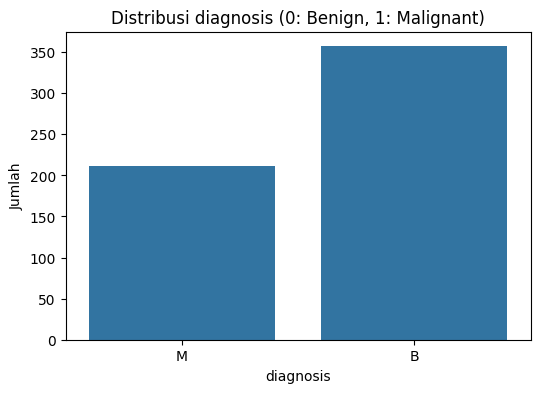

In [19]:
# Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)  # Changed 'target' to 'Diagnosis'
plt.title('Distribusi diagnosis (0: Benign, 1: Malignant)')
plt.xlabel('diagnosis')
plt.ylabel('Jumlah')
plt.show()

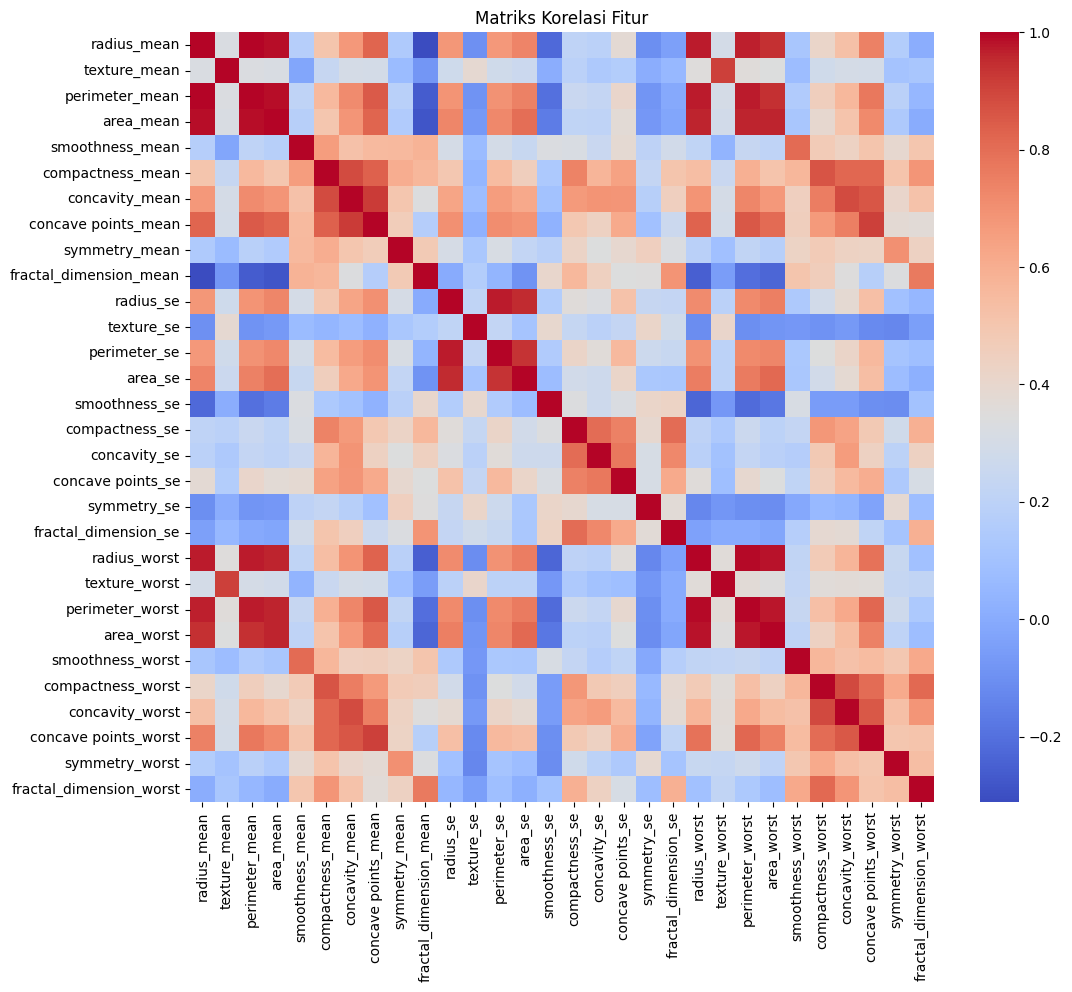

In [21]:
correlation_matrix = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()

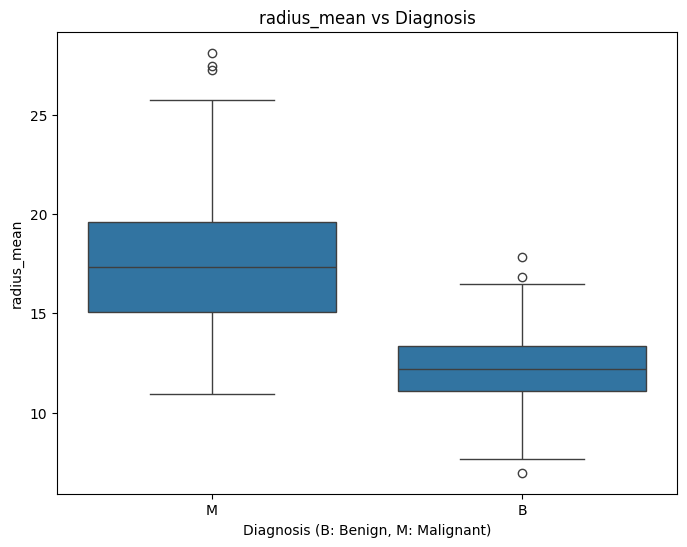

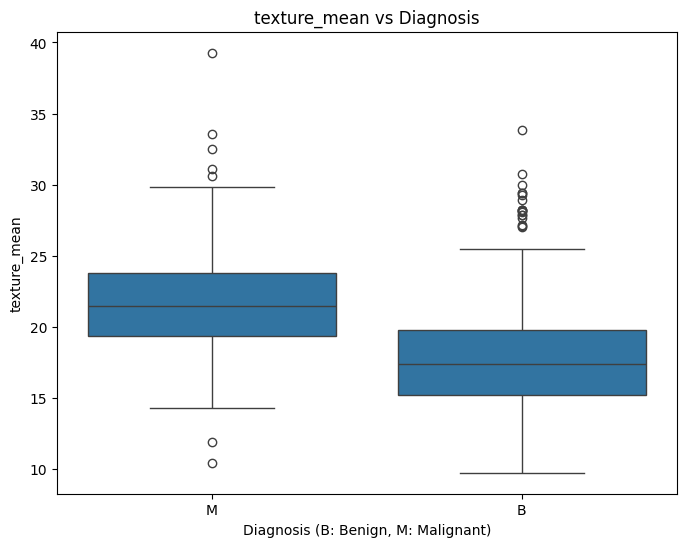

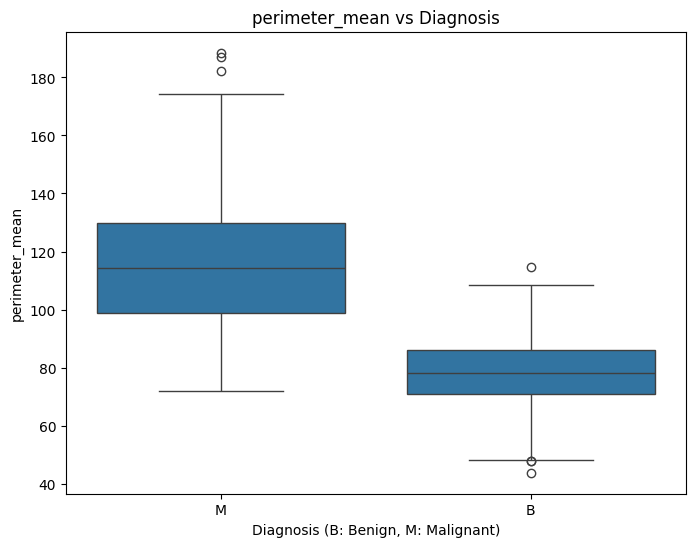

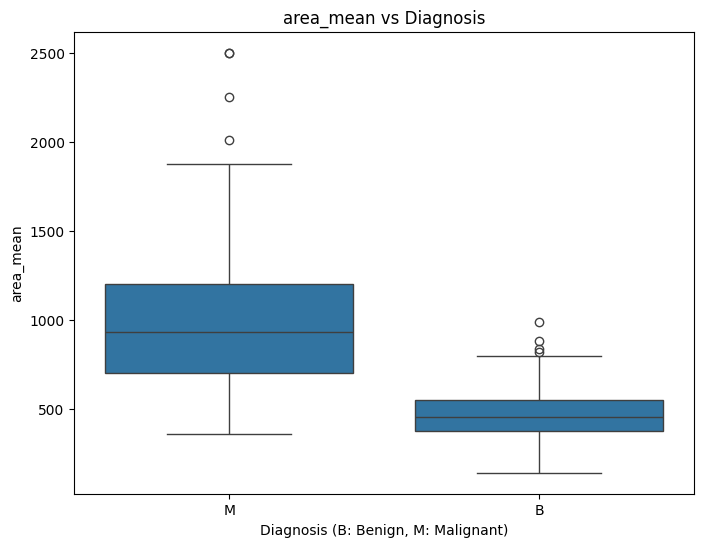

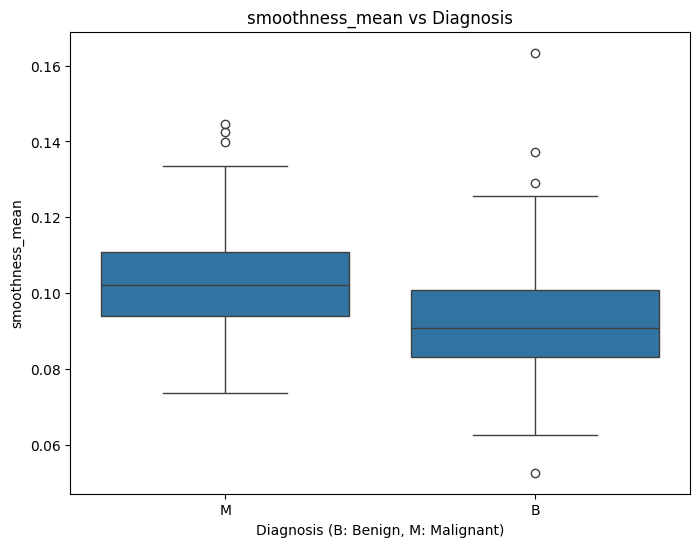

In [22]:
# Boxplot untuk melihat distribusi fitur terhadap target
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=df)  # Ganti 'target' dengan 'diagnosis'
    plt.title(f'{feature} vs Diagnosis')
    plt.xlabel('Diagnosis (B: Benign, M: Malignant)') # Sesuaikan label jika perlu
    plt.ylabel(feature)
    plt.show()

In [24]:
# ## 5. Data Preparation
# Pisahkan fitur dan target
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
X = df[features]
y = df['diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penanganan Imbalance Class (SMOTE hanya pada data training)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))
# Standarisasi
scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train_resampled)
X_test_prepared = scaler.transform(X_test)


Distribusi kelas sebelum SMOTE: Counter({np.int64(0): 285, np.int64(1): 170})
Distribusi kelas setelah SMOTE: Counter({np.int64(1): 285, np.int64(0): 285})


In [33]:
# ## 6. Pembangunan Model
# ### 6.1 Membangun Model Klasifikasi (dengan hyperparameter tuning menggunakan GridSearchCV)

# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_prepared, y_train_resampled)
best_lr = grid_lr.best_estimator_
print("Best Params for Logistic Regression:", grid_lr.best_params_)

# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_prepared, y_train_resampled)
best_dt = grid_dt.best_estimator_
print("Best Params for Decision Tree:", grid_dt.best_params_)

Best Params for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [34]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_prepared, y_train_resampled)
best_rf = grid_rf.best_estimator_
print("Best Params for Random Forest:", grid_rf.best_params_)

Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [35]:
# K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_prepared, y_train_resampled)
best_knn = grid_knn.best_estimator_
print("Best Params for K-Nearest Neighbors:", grid_knn.best_params_)

Best Params for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [36]:
# Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_prepared, y_train_resampled)
best_svm = grid_svm.best_estimator_
print("Best Params for Support Vector Machine:", grid_svm.best_params_)

Best Params for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



Evaluasi Model Terbaik:


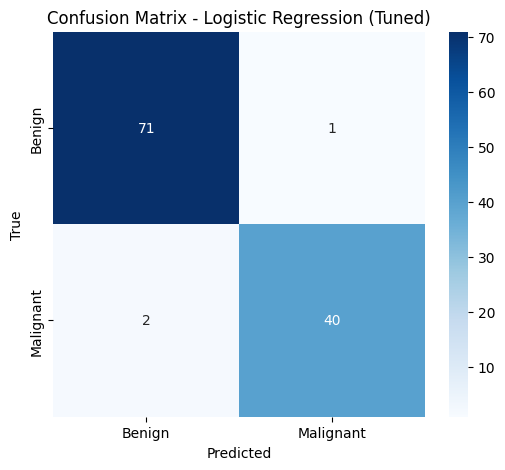

Logistic Regression (Tuned) Accuracy: 0.9737
Logistic Regression (Tuned) F1-Score: 0.9639
Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



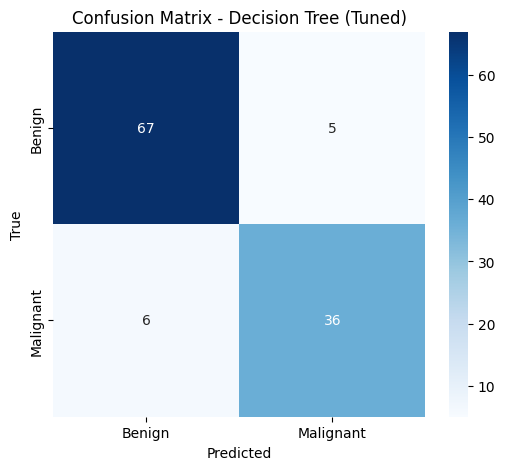

Decision Tree (Tuned) Accuracy: 0.9035
Decision Tree (Tuned) F1-Score: 0.8675
Decision Tree (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



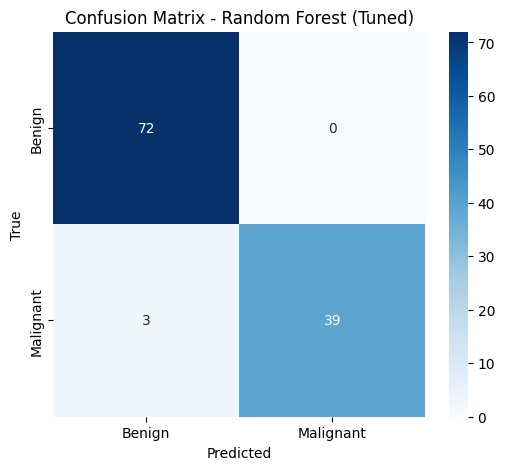

Random Forest (Tuned) Accuracy: 0.9737
Random Forest (Tuned) F1-Score: 0.9630
Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



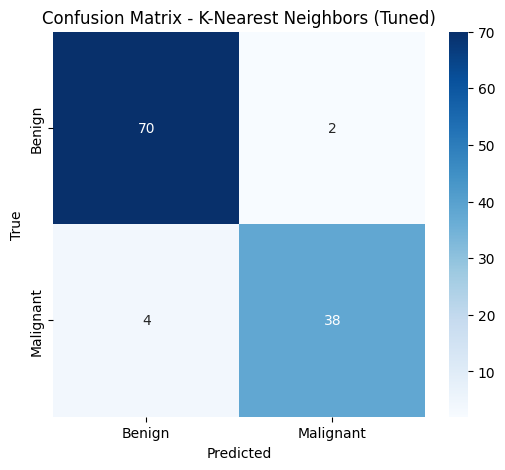

K-Nearest Neighbors (Tuned) Accuracy: 0.9474
K-Nearest Neighbors (Tuned) F1-Score: 0.9268
K-Nearest Neighbors (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



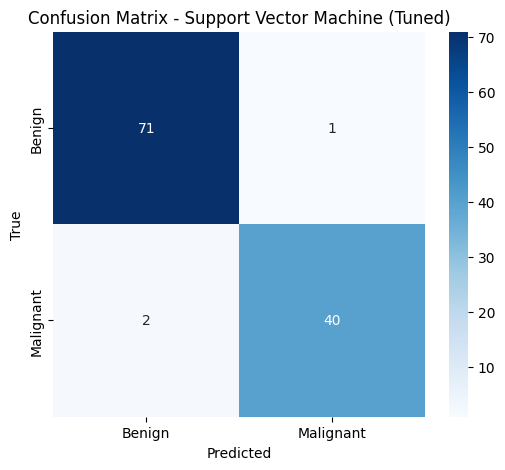

Support Vector Machine (Tuned) Accuracy: 0.9737
Support Vector Machine (Tuned) F1-Score: 0.9639
Support Vector Machine (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Ringkasan Hasil Evaluasi Model Setelah Tuning:
                            Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression (Tuned)  0.973684   0.975610  0.952381  0.963855
1           Decision Tree (Tuned)  0.903509   0.878049  0.857143  0.867470
2           Random Forest (Tuned)  0.973684   1.000000  0.928571  0.962963
3     K-Nearest Neighbors (Tuned)  0.947368   0.950000  0.904762  0.926829
4  Support Vector Machine (Tuned)  0.973684   0.975610  0.952381  0.963855


In [46]:
# ### 6.2 Evaluasi Model Terbaik
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

    plot_confusion_matrix(cm, model_name)
    return results

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluation_results = {}

print("\nEvaluasi Model Terbaik:")

# Evaluate Logistic Regression
eval_lr = evaluate_model(best_lr, X_test_prepared, y_test, "Logistic Regression (Tuned)")
evaluation_results['Logistic Regression (Tuned)'] = eval_lr
print(f"Logistic Regression (Tuned) Accuracy: {eval_lr['Accuracy']:.4f}")
print(f"Logistic Regression (Tuned) F1-Score: {eval_lr['F1-Score']:.4f}")
print(f"Logistic Regression (Tuned) Classification Report:\n{eval_lr['Classification Report']}")
print("=" * 60)

# Evaluate Decision Tree
eval_dt = evaluate_model(best_dt, X_test_prepared, y_test, "Decision Tree (Tuned)")
evaluation_results['Decision Tree (Tuned)'] = eval_dt
print(f"Decision Tree (Tuned) Accuracy: {eval_dt['Accuracy']:.4f}")
print(f"Decision Tree (Tuned) F1-Score: {eval_dt['F1-Score']:.4f}")
print(f"Decision Tree (Tuned) Classification Report:\n{eval_dt['Classification Report']}")
print("=" * 60)

# Evaluate Random Forest
eval_rf = evaluate_model(best_rf, X_test_prepared, y_test, "Random Forest (Tuned)")
evaluation_results['Random Forest (Tuned)'] = eval_rf
print(f"Random Forest (Tuned) Accuracy: {eval_rf['Accuracy']:.4f}")
print(f"Random Forest (Tuned) F1-Score: {eval_rf['F1-Score']:.4f}")
print(f"Random Forest (Tuned) Classification Report:\n{eval_rf['Classification Report']}")
print("=" * 60)

# Evaluate K-Nearest Neighbors
eval_knn = evaluate_model(best_knn, X_test_prepared, y_test, "K-Nearest Neighbors (Tuned)")
evaluation_results['K-Nearest Neighbors (Tuned)'] = eval_knn
print(f"K-Nearest Neighbors (Tuned) Accuracy: {eval_knn['Accuracy']:.4f}")
print(f"K-Nearest Neighbors (Tuned) F1-Score: {eval_knn['F1-Score']:.4f}")
print(f"K-Nearest Neighbors (Tuned) Classification Report:\n{eval_knn['Classification Report']}")
print("=" * 60)

# Evaluate Support Vector Machine
eval_svm = evaluate_model(best_svm, X_test_prepared, y_test, "Support Vector Machine (Tuned)")
evaluation_results['Support Vector Machine (Tuned)'] = eval_svm
print(f"Support Vector Machine (Tuned) Accuracy: {eval_svm['Accuracy']:.4f}")
print(f"Support Vector Machine (Tuned) F1-Score: {eval_svm['F1-Score']:.4f}")
print(f"Support Vector Machine (Tuned) Classification Report:\n{eval_svm['Classification Report']}")
print("=" * 60)

# Membuat DataFrame untuk ringkasan hasil evaluasi
evaluation_summary_tuned = pd.DataFrame([
    {
        'Model': model_label,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_label, metrics in evaluation_results.items()
])

print("\nRingkasan Hasil Evaluasi Model Setelah Tuning:")
print(evaluation_summary_tuned)